<center><font size=6> Employee Attrition Prediction (IBM) </font></center>

## Team Members:
* Adriana Cruz
* Tyler Gannon
* Drew Hebert
* Chad Trudgeon

## Data Source:
https://www.kaggle.com/datasets/yasserh/ibm-attrition-dataset

## Data Dictionary

* Age: Age of employee
* Attrition: Employee attrition status
* Department: Department of work
* DistanceFromHome
* Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
* EducationField
* EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* MaritalStatus
* MonthlyIncome
* NumCompaniesWorked: Number of companies worked prior to IBM
* WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
* YearsAtCompany: Current years of service in IBM

## Importing necessary libraries

In [90]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# library to split data
from sklearn.model_selection import train_test_split

# libraries to encode the variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler

# importing the metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# importing grid search and random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing tensorflow library
import tensorflow as tf

# importing keras library and tuner
from tensorflow import keras

# importing different functions to build models
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# importing backend
from tensorflow.keras import backend

# library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets to Consider/IBM.csv')

In [93]:
# checking the number of rows and columns in the data
df.shape

(1470, 13)

The dataset has 1470 rows and 13 columns

## Data Overview

In [94]:
# viewing the first 5 rows of the data
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [95]:
# checking the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


* There are 1470 rows and 13 columns in the data.
* 4 columns are of the object datatype and 9 columns are numerical.
* There are no null values

In [96]:
# checking for duplicate values in the data
df.duplicated().sum()

np.int64(0)

* There are no duplicate values

In [97]:
# confirming no missing values in the data
df.isnull().sum()

,0
Age,0
Attrition,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
JobSatisfaction,0
MaritalStatus,0
MonthlyIncome,0


In [98]:
# checking the dependent variable percentages
df["Attrition"].value_counts(1)

,proportion
Attrition,
No,0.838776
Yes,0.161224


* 83.9% of workers did not quit their job
* 16.1% of workers did quit their job

In [99]:
# viewing the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [100]:
# checking the number of unique values in each column
df.nunique()

,0
Age,43
Attrition,2
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
JobSatisfaction,4
MaritalStatus,3
MonthlyIncome,1349


In [101]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Attrition are :
Attrition
No     1233
Yes     237
Name: count, dtype: int64
**************************************************
Unique values in Department are :
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
**************************************************
Unique values in EducationField are :
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
**************************************************


## Exploratory Data Analysis

### Univariate Analysis

In [102]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [103]:
df.dtypes

,0
Age,int64
Attrition,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
JobSatisfaction,int64
MaritalStatus,object
MonthlyIncome,int64


### Age

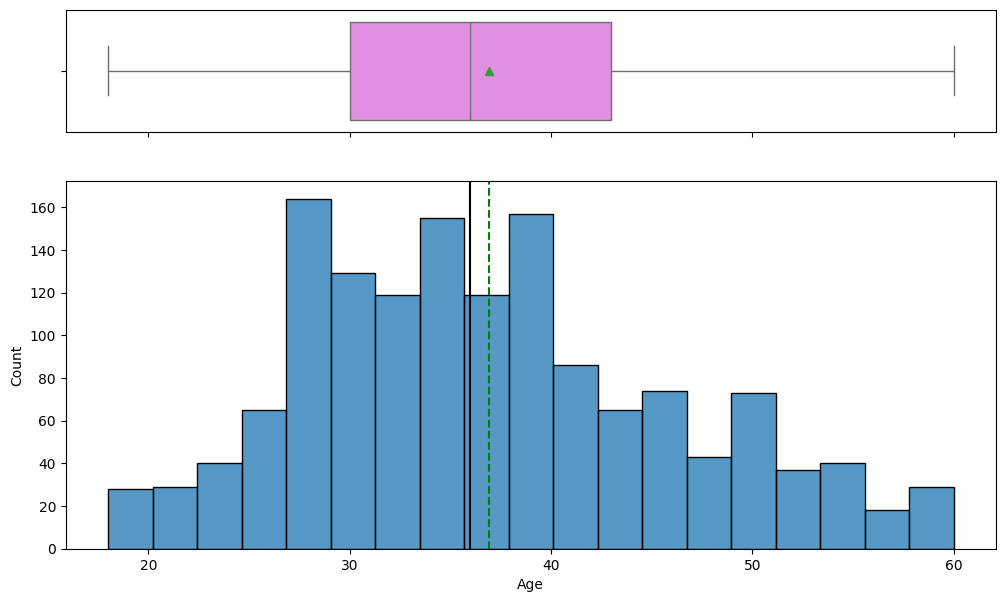

In [104]:
histogram_boxplot(df, "Age")

### Distance From Home

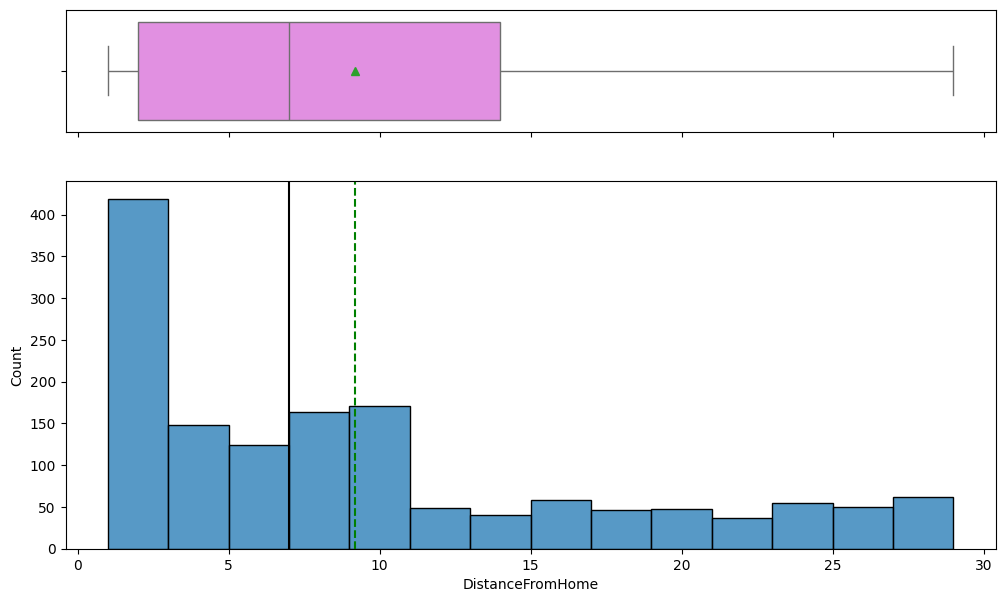

In [105]:
histogram_boxplot(df, "DistanceFromHome")

### Monthly Income

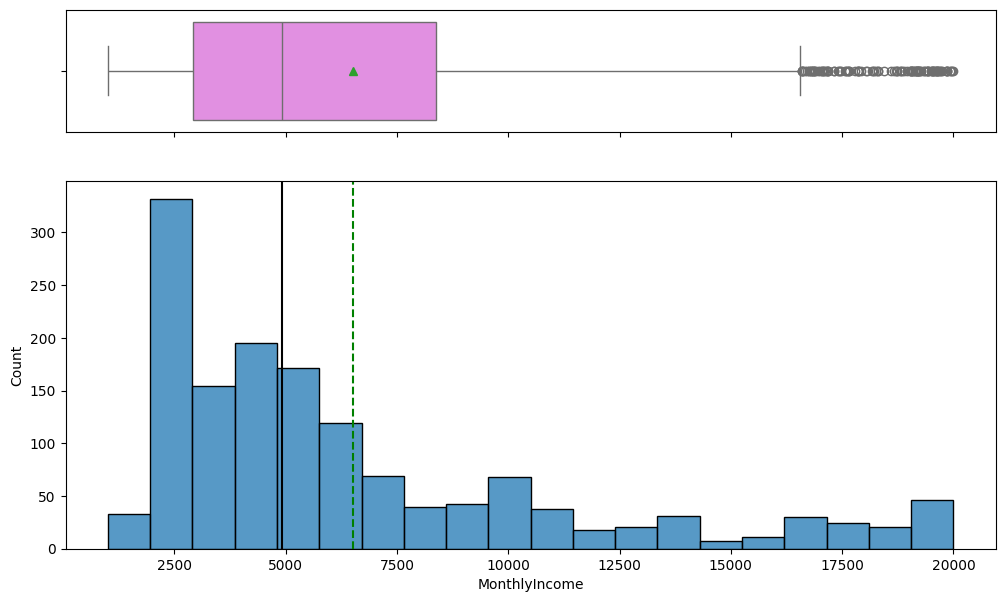

In [106]:
histogram_boxplot(df, "MonthlyIncome")

### Number of Companies Worked

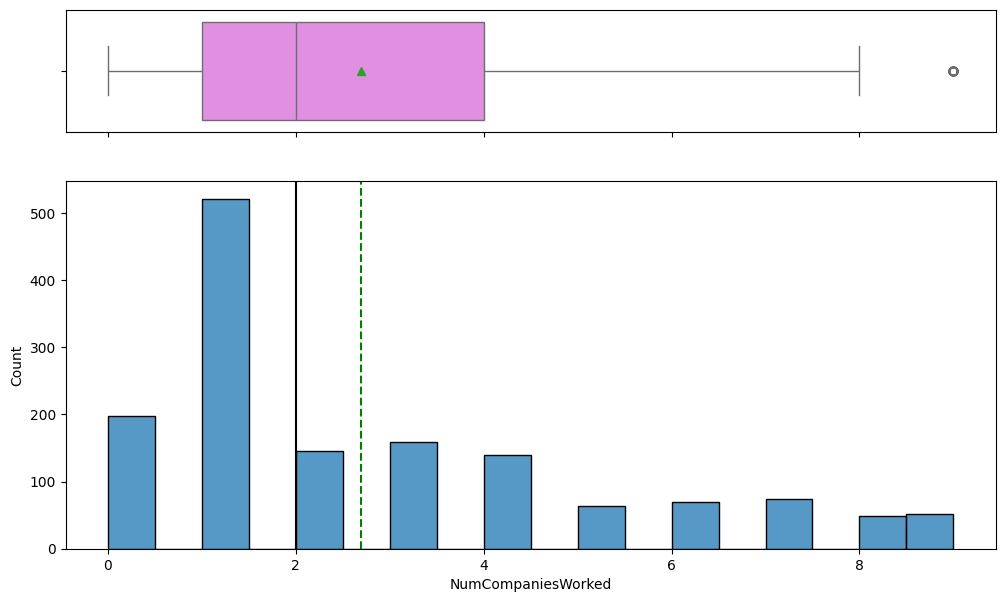

In [107]:
histogram_boxplot(df, "NumCompaniesWorked")

### Years at Company

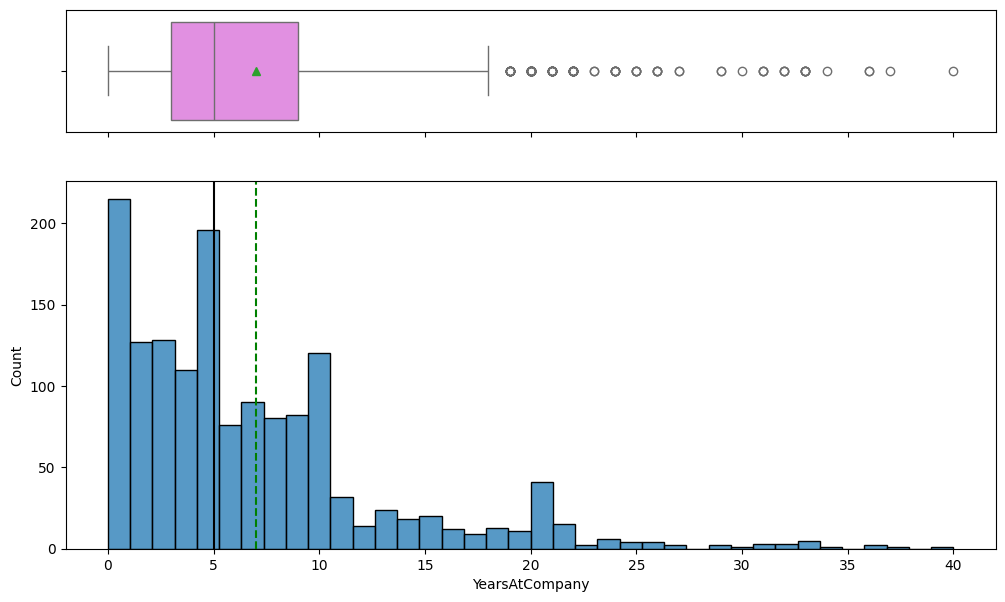

In [108]:
histogram_boxplot(df, "YearsAtCompany")

In [109]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Department

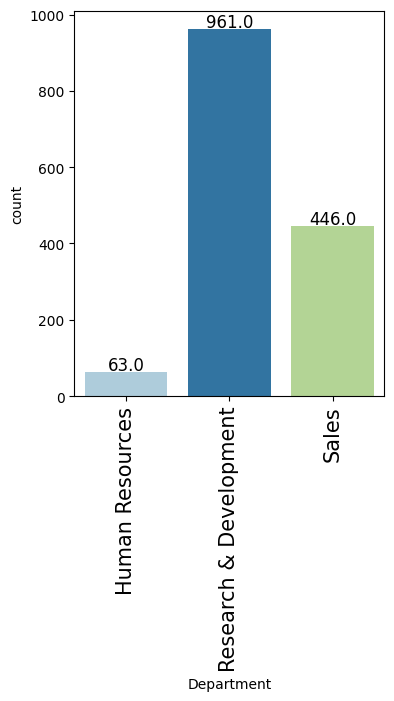

In [110]:
labeled_barplot(df, "Department")

### Education Level

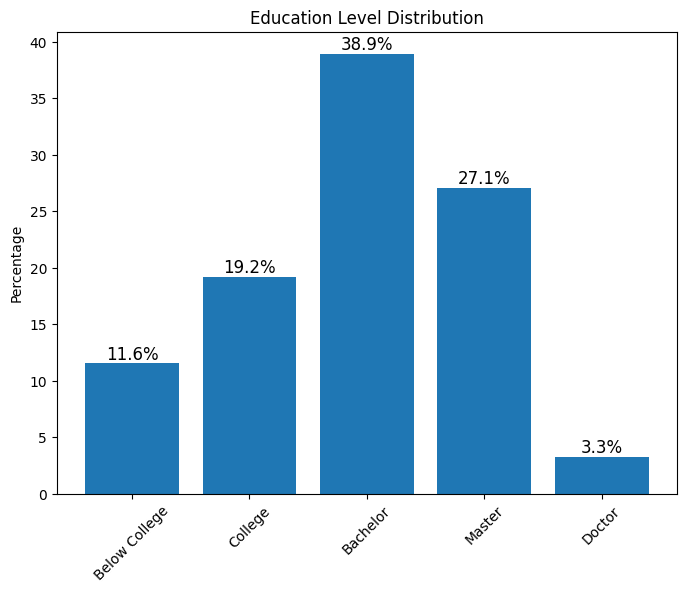

In [111]:
# Mapping education levels
education_labels = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}

# Calculate percentage distribution
education_counts = df["Education"].value_counts(normalize=True) * 100

# Sort index for proper ordering
education_counts = education_counts.sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(education_counts.index, education_counts.values, tick_label=[education_labels[i] for i in education_counts.index])

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%',
             ha='center', va='bottom', fontsize=12)

# Labels and title
plt.ylabel("Percentage")
plt.title("Education Level Distribution")

# Show plot
plt.xticks(rotation=45)
plt.show()

### Education Field

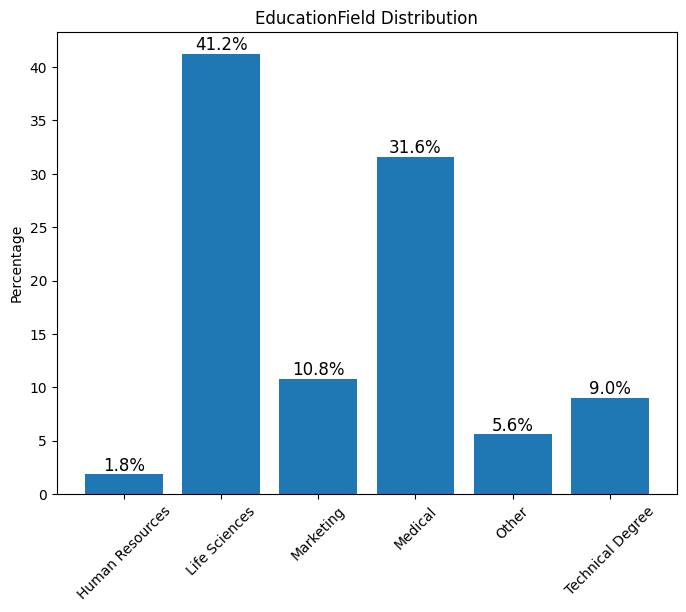

In [112]:
# Calculate percentage distribution
field_counts = df["EducationField"].value_counts(normalize=True) * 100

# Sort index for proper ordering
field_counts = field_counts.sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(field_counts.index, field_counts.values, tick_label=field_counts.index)

# Add labels on bars
for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%',
                 ha='center', va='bottom', fontsize=12)

# Labels and title
plt.ylabel("Percentage")
plt.title(f"EducationField Distribution")

# Show plot
plt.xticks(rotation=45)
plt.show()

### Environment Satisfaction

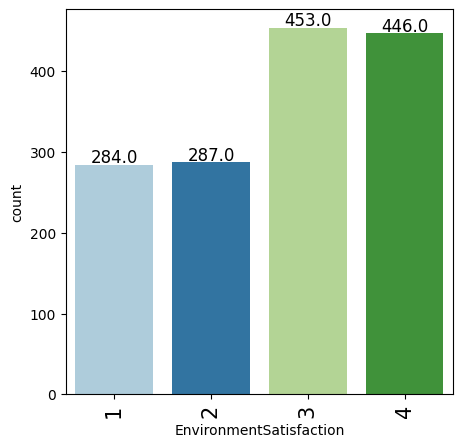

In [113]:
labeled_barplot(df, "EnvironmentSatisfaction")

### Marital Status

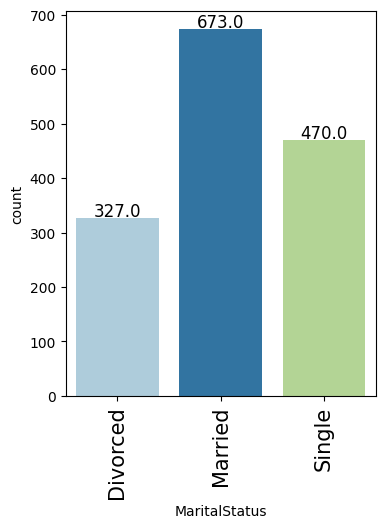

In [114]:
labeled_barplot(df, "MaritalStatus")

### Work-Life Balance

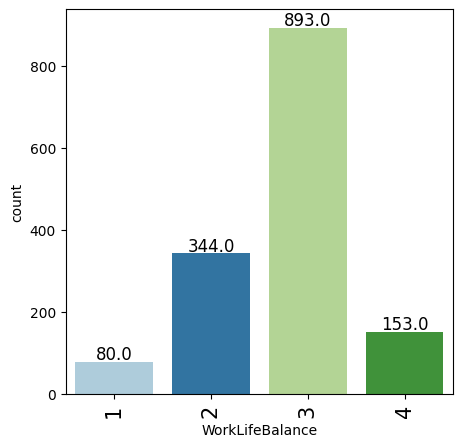

In [115]:
labeled_barplot(df, "WorkLifeBalance")

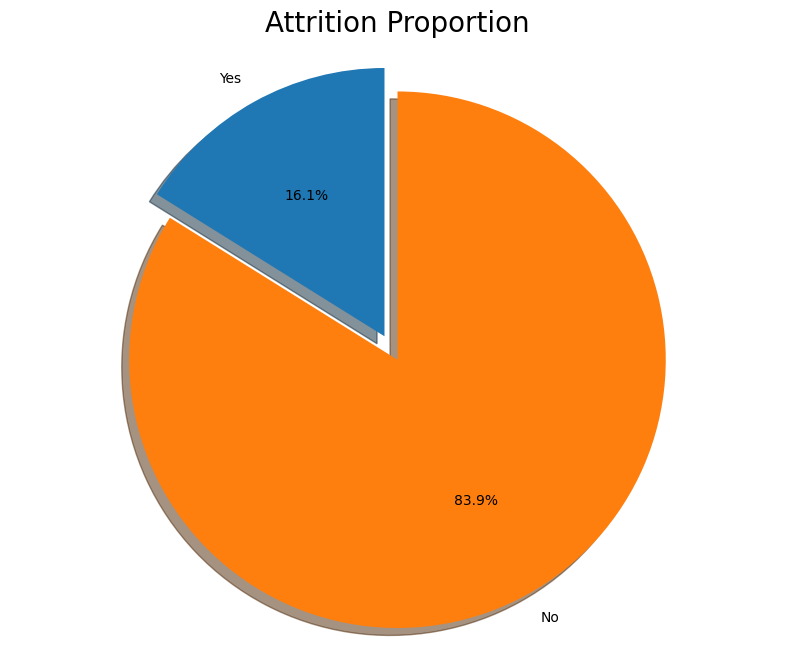

In [116]:
# Mapping Attrition values to labels
attrition_labels = ["Yes", "No"]

# Calculate counts for each category
attrition_counts = [df.Attrition[df['Attrition'] == "Yes"].count(),
                    df.Attrition[df['Attrition'] == "No"].count()]

# Define explode values to highlight the "Yes" category
explode = (0.1, 0)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(attrition_counts, explode=explode, labels=attrition_labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Title
plt.title("Attrition Proportion", size=20)

# Show plot
plt.show()

* 79.6% of customers did not leave the bank
* 20.4% of customer left the bank
* Due the disproportionate nature of the data, we'll want to stratify the data when we do the train, validation, test split.

### Bivariate Analysis

In [117]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

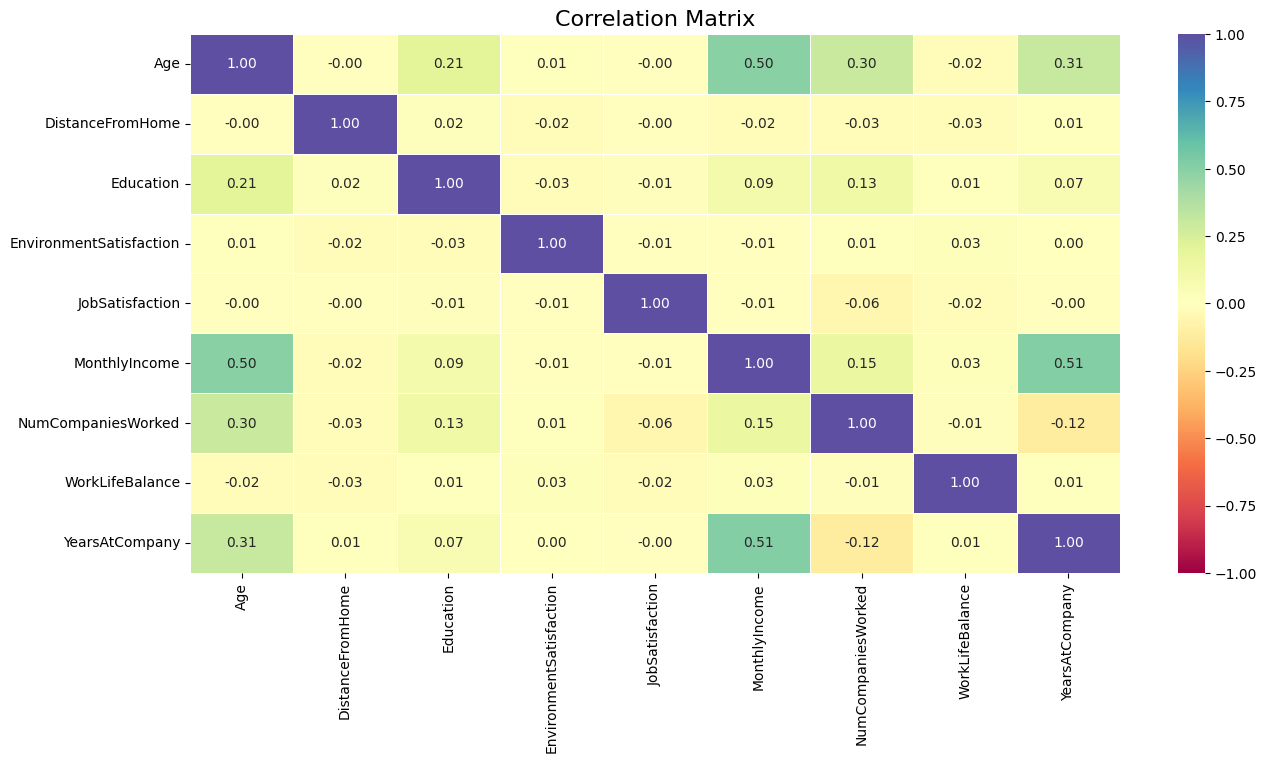

In [118]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the figure size
plt.figure(figsize=(15, 7))

# Create the heatmap
sns.heatmap(
    corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", linewidths=0.5
)

# Title for better visualization
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

### Monthly Income by Department

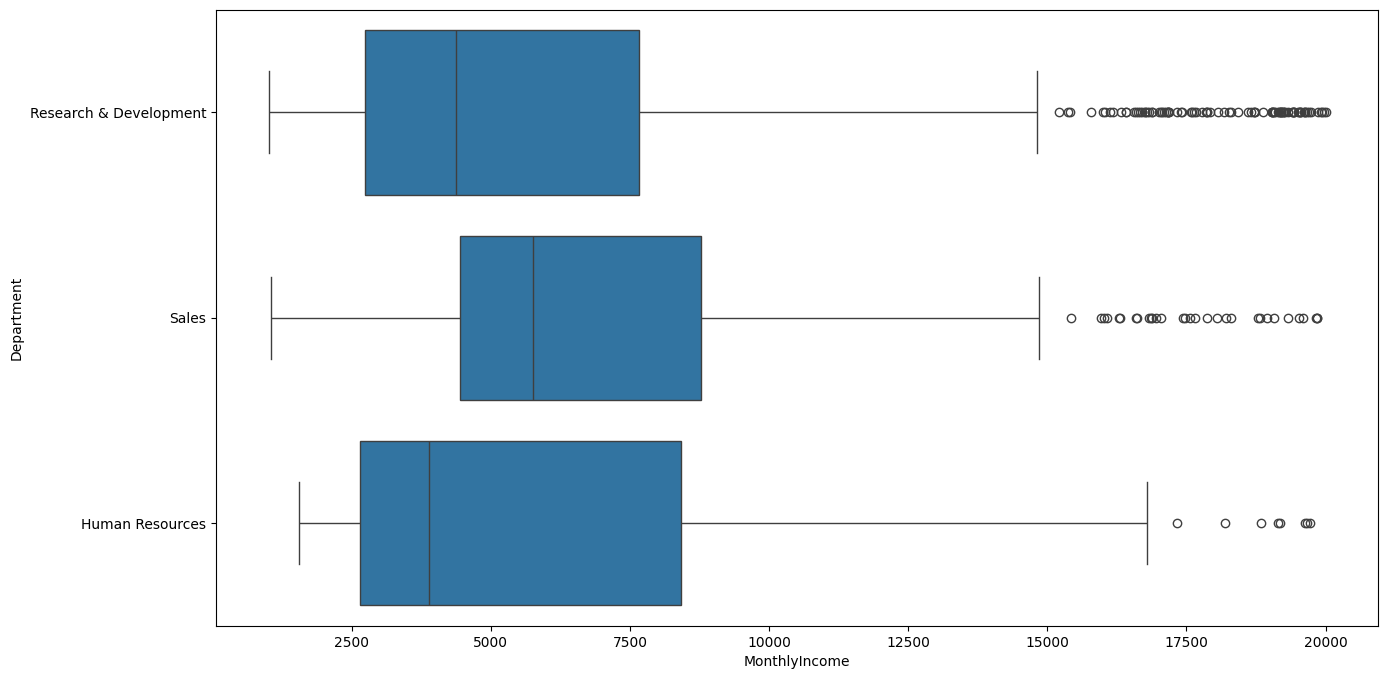

In [119]:
plt.figure(figsize=(15,8))
a=sns.boxplot(x='MonthlyIncome',y='Department',data=df.sort_values('MonthlyIncome',ascending=False),orient="h")

### Monthly Income by Number of Companies Worked

<Axes: xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

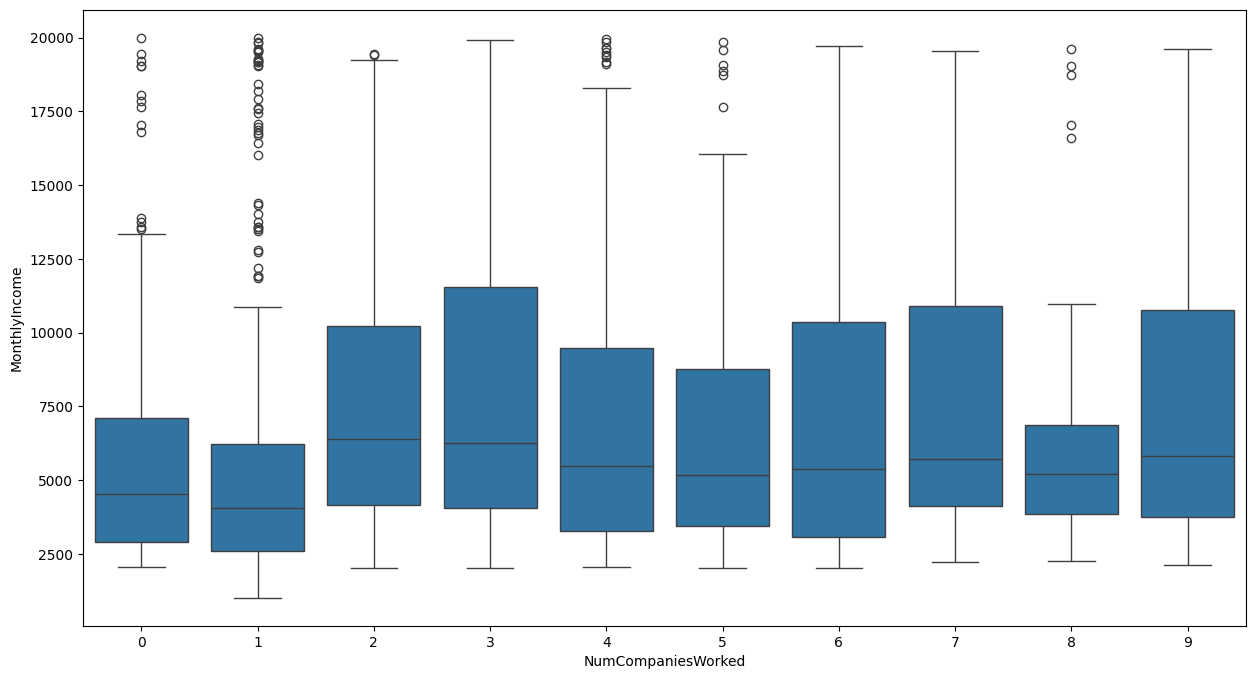

In [120]:
plt.figure(figsize=(15,8))
sns.boxplot(x='NumCompaniesWorked',y='MonthlyIncome',data=df.sort_values('MonthlyIncome',ascending=False))

### Attrition by Monthly Income

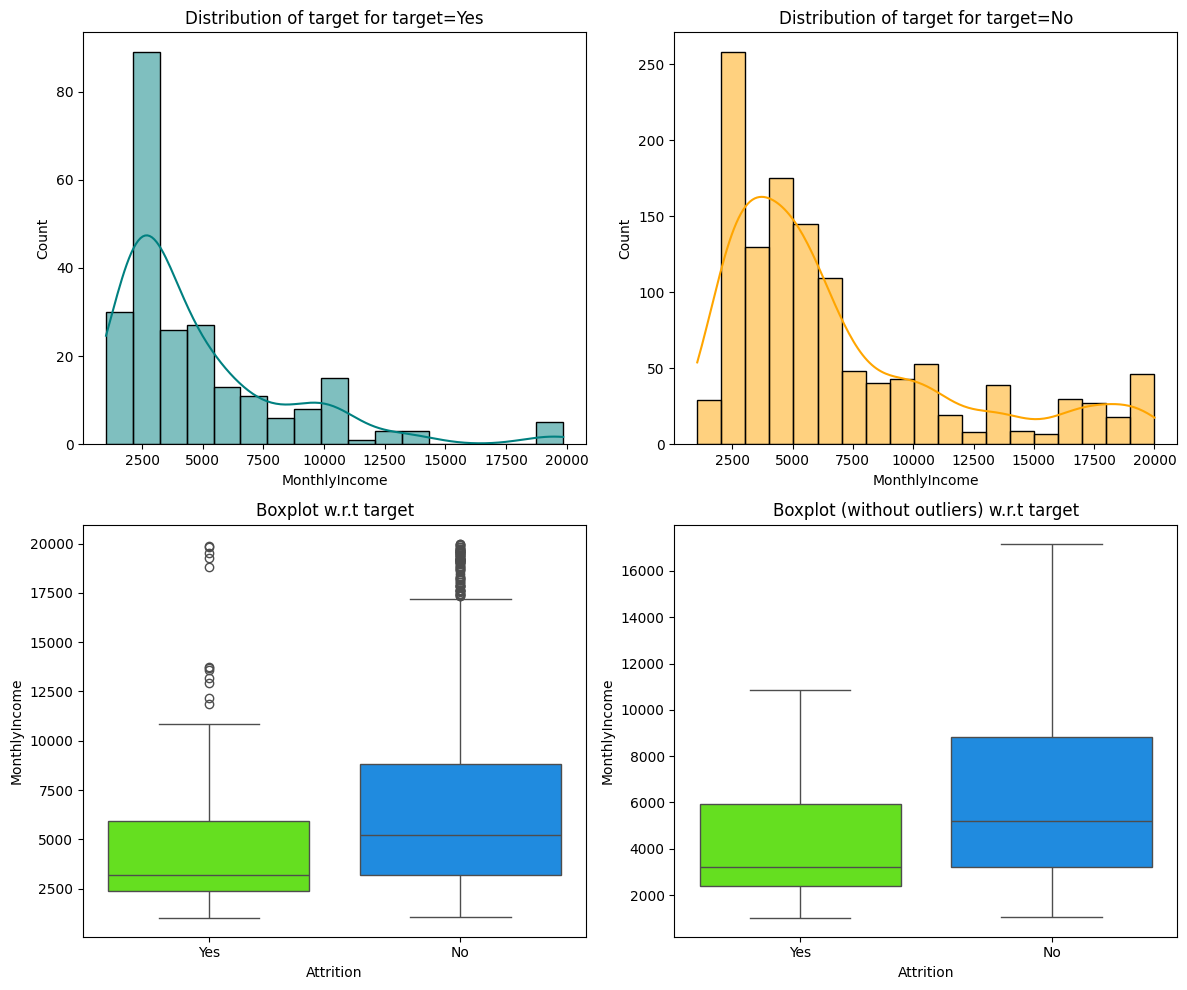

In [121]:
distribution_plot_wrt_target(df, "MonthlyIncome", "Attrition")

### Attrition by Age

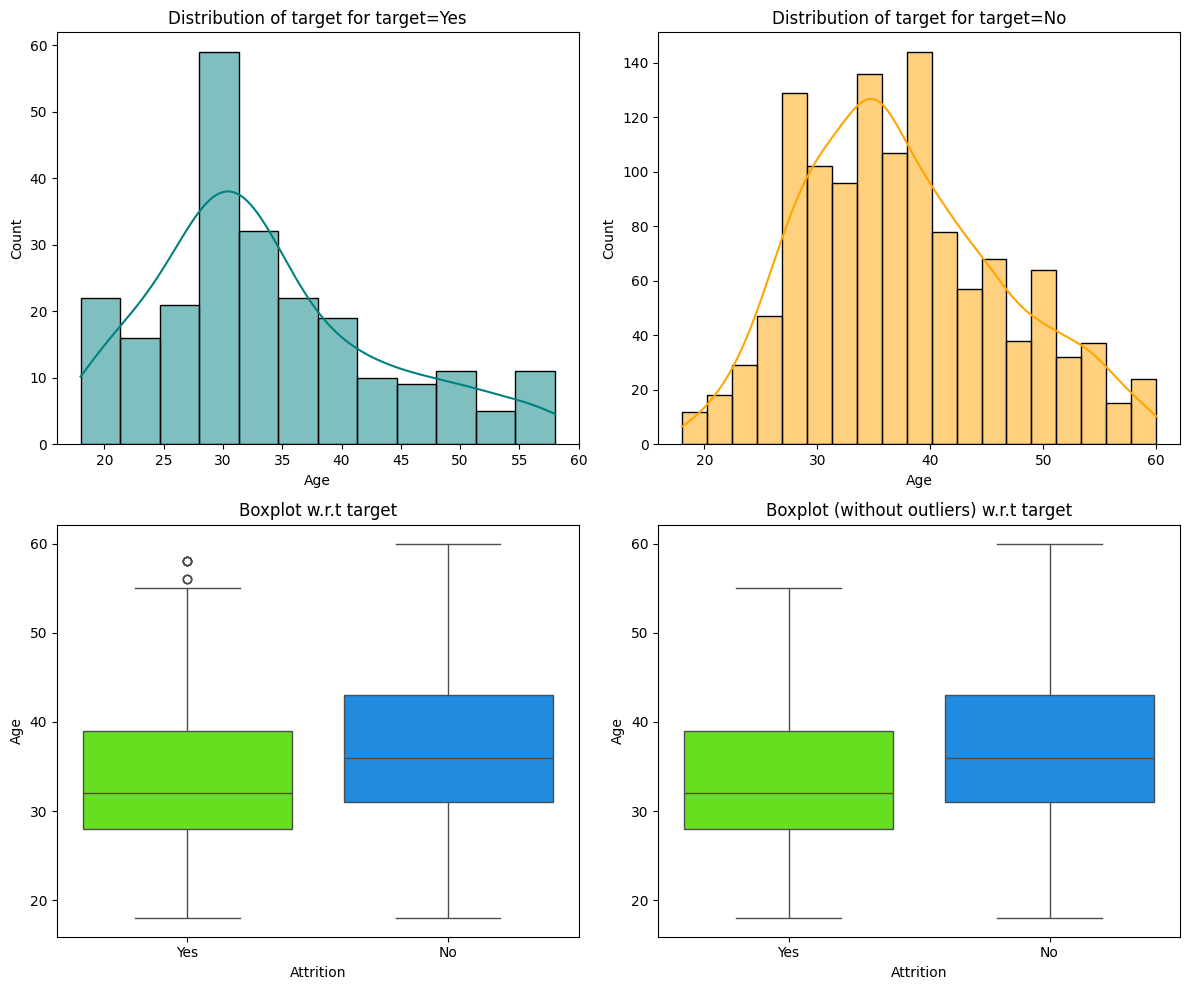

In [122]:
distribution_plot_wrt_target(df, "Age", "Attrition")

### Attrition by Distance From Home

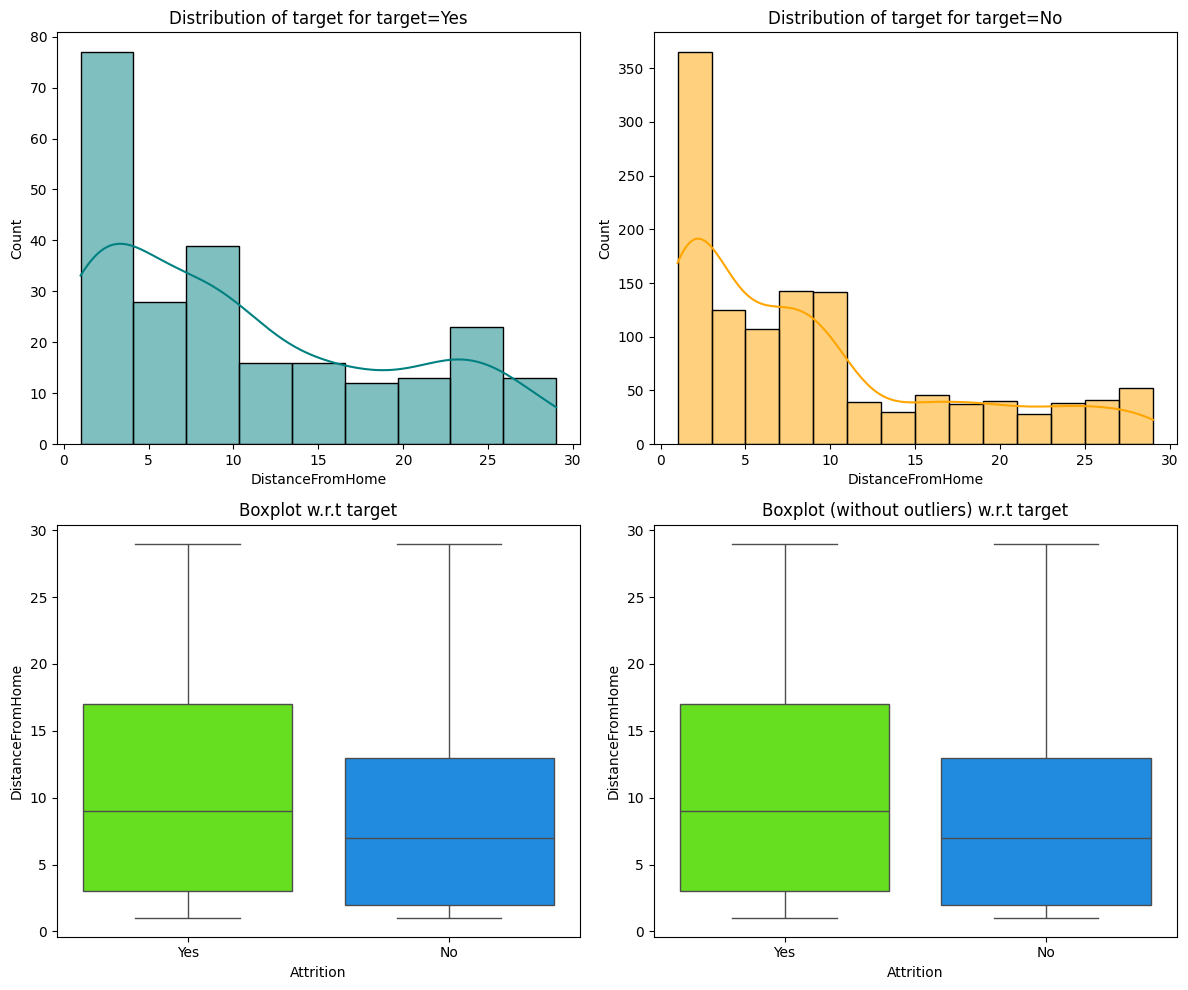

In [123]:
distribution_plot_wrt_target(df, "DistanceFromHome", "Attrition")

### Attrition by Number of Companies Worked

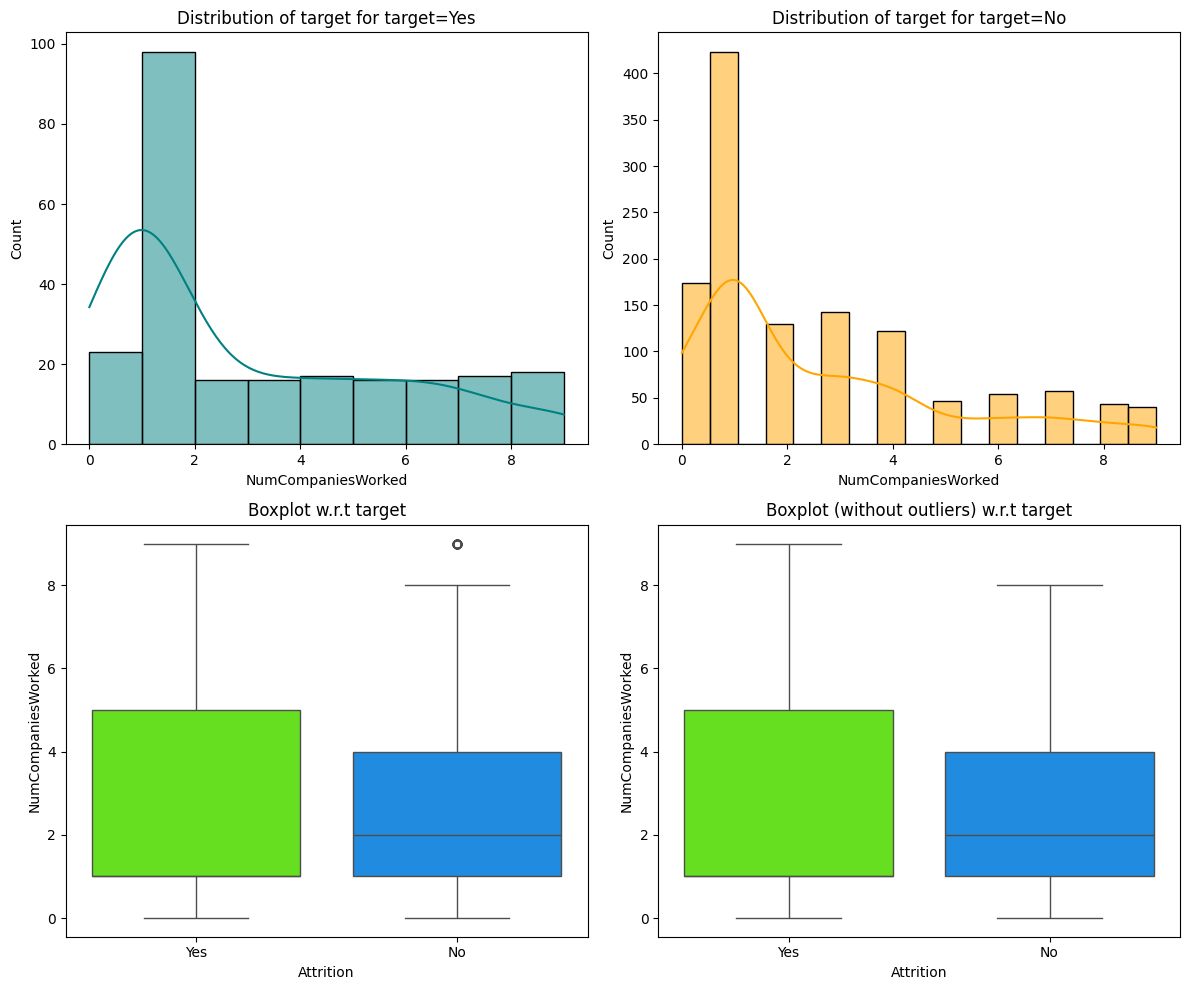

In [124]:
distribution_plot_wrt_target(df, "NumCompaniesWorked", "Attrition")

### Attrition by Years at Company

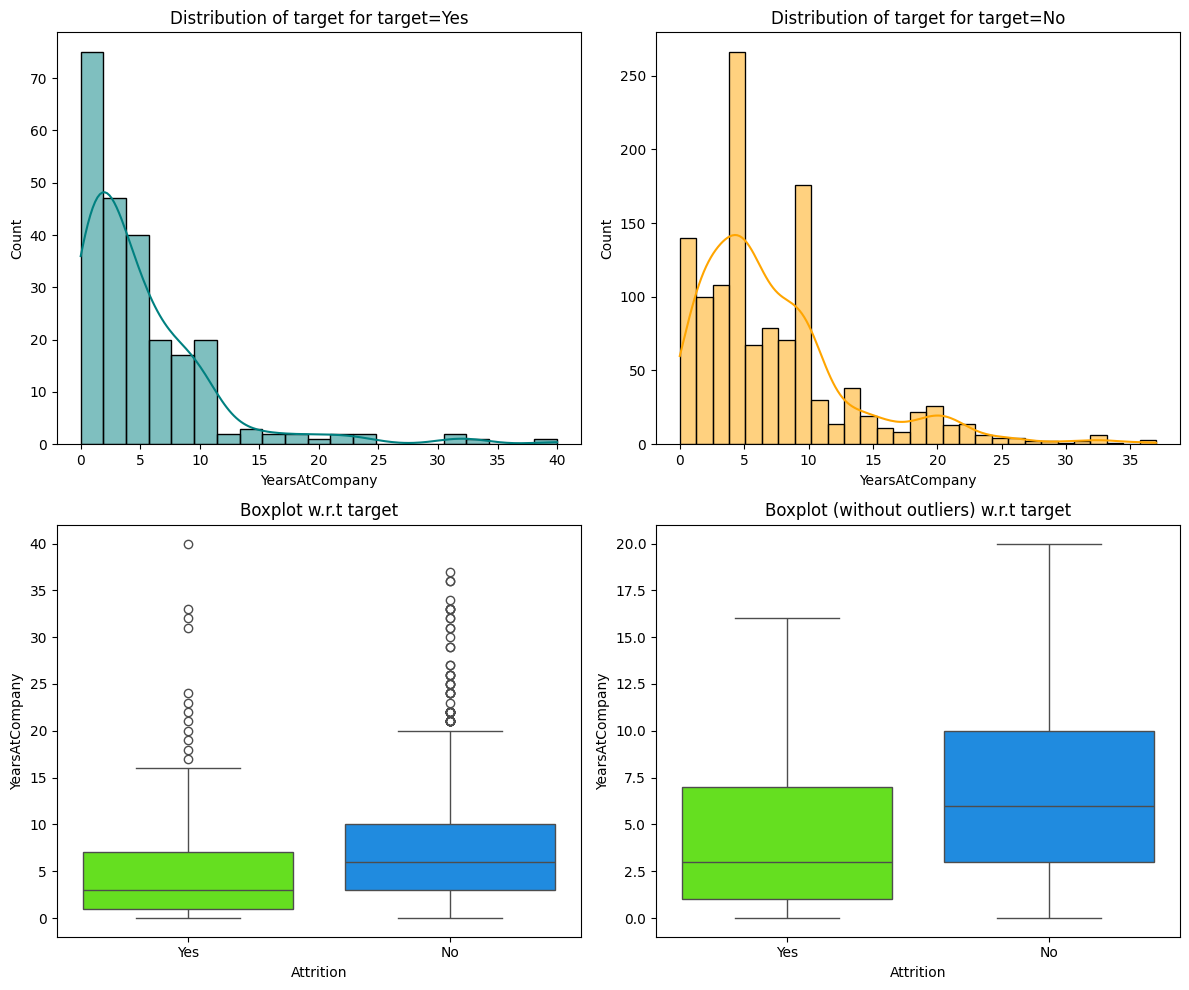

In [125]:
distribution_plot_wrt_target(df, "YearsAtCompany", "Attrition")

### Attrition by Department

In [126]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

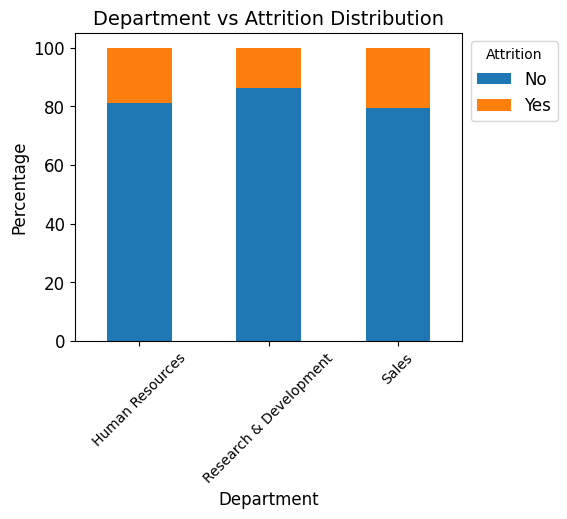

In [127]:
# Define custom colors based on the requested theme
custom_colors = {"No": "#1f77b4", "Yes": "#ff7f0e"}  # Blue for "No", Orange for "Yes"

def stacked_barplot(data, x_col, hue_col):
    # Count occurrences and normalize for percentages
    counts = data.groupby([x_col, hue_col]).size().unstack(fill_value=0)
    counts_percentage = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot stacked bar chart with custom colors
    ax = counts_percentage.plot(kind='bar', stacked=True, figsize=(5, 4),
                                color=[custom_colors[col] for col in counts_percentage.columns])

    # Labels and title
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.title(f"{x_col} vs {hue_col} Distribution", fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.yticks(fontsize=12)

    # Place legend outside of the chart
    plt.legend(title=hue_col, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

    # Show plot
    plt.show()

# Call the function for Department vs. Attrition with the new colors
stacked_barplot(df, "Department", "Attrition")

## Build and Run Models
* Logistic Regression
* Random Forest
* Random Forest (GridSearchCV)
* Neural Net (ADAM)
* Neural Net (RMSPROP)
* Neural Net (SGD)


Best Hyperparameters for Random Forest (GridSearchCV):
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC Score: 0.8418

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model Comparison Summary:
                  Model  Accuracy       AUC  Precision    Recall  F1 Score
0   Logistic Regression  0.857143  0.682545   0.600000  0.136364  0.222222
3               XGBoost  0.816327  0.673091   0.333333  0.227273  0.270270
2     RF (GridSearchCV)  0.836735  0.664364   0.333333  0.090909  0.142857
4     Neural Net (ADAM)  0.857143  0.649818   0.571429  0.181818  0.275862
5  Neural Net (RMSPROP)  0.863946  0.642182   0.750000  0.136364  0.230769
1         Random Forest  0.836735  0.635636   0.375000  0.136364  0.200000
6      Neural Net (SGD)  0.850340  0.631636   0.500000  0.136364  0.214286


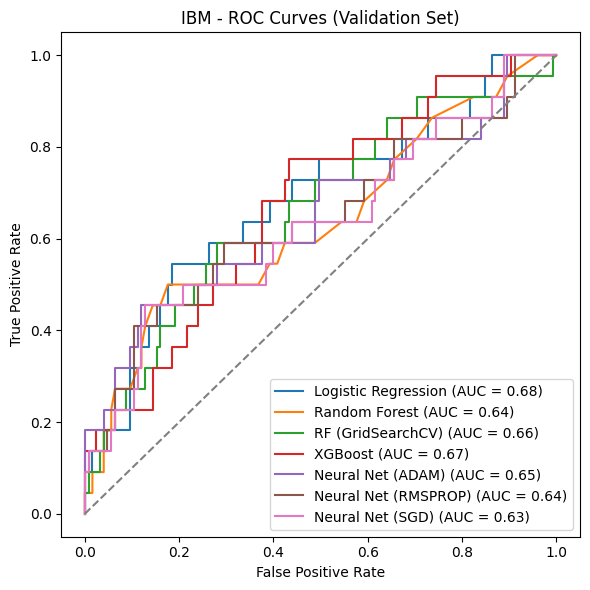

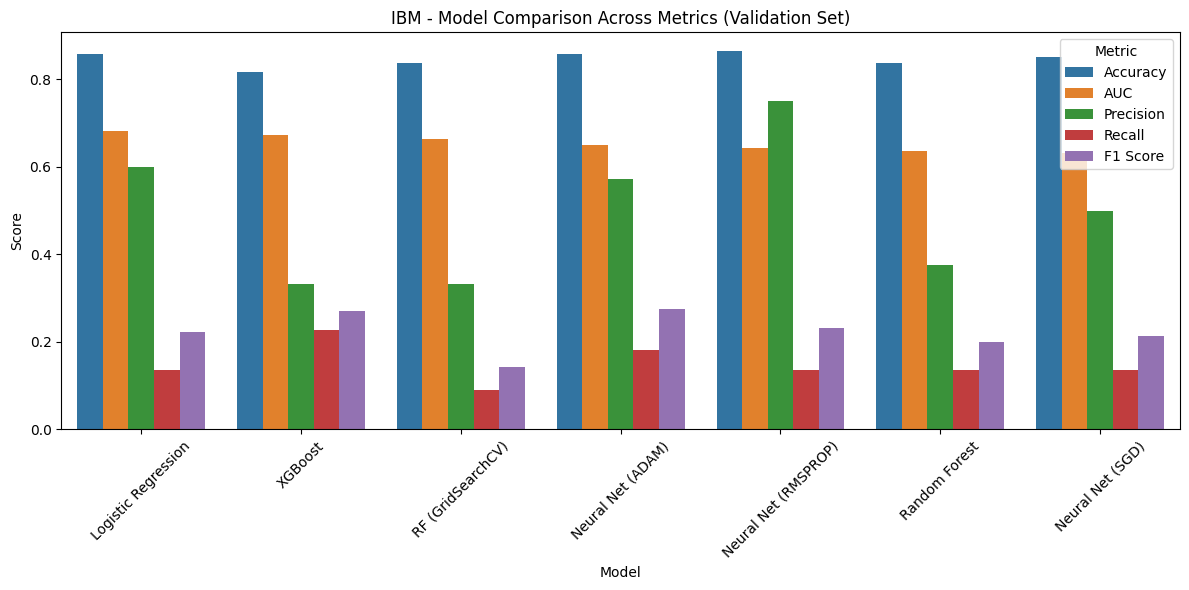

Top 10 Features that Increase Likelihood of Leaving:
                            Feature  Coefficient
17             MaritalStatus_Single     0.608526
6                NumCompaniesWorked     0.350916
1                  DistanceFromHome     0.221898
16            MaritalStatus_Married     0.179966
10                 Department_Sales     0.105723
2                         Education     0.009048
15  EducationField_Technical Degree    -0.024418
8                    YearsAtCompany    -0.078567
14             EducationField_Other    -0.134257
12         EducationField_Marketing    -0.154849
Top 10 Features that Decrease Likelihood of Leaving:
                              Feature  Coefficient
5                       MonthlyIncome    -0.502694
13             EducationField_Medical    -0.357520
11       EducationField_Life Sciences    -0.337239
4                     JobSatisfaction    -0.320050
0                                 Age    -0.309905
3             EnvironmentSatisfaction    -0.24913

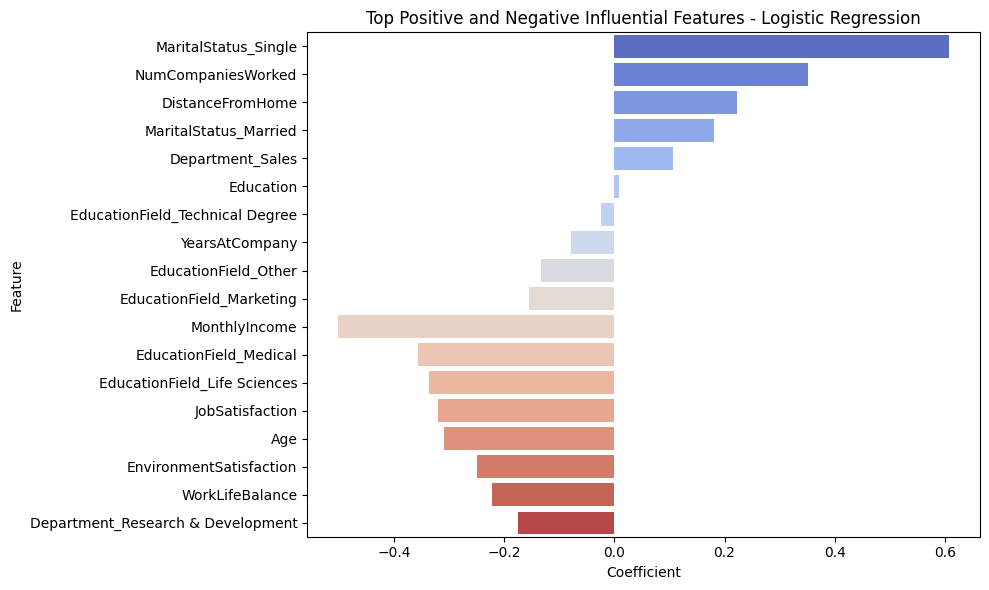

Confusion Matrix for Best Model: Logistic Regression


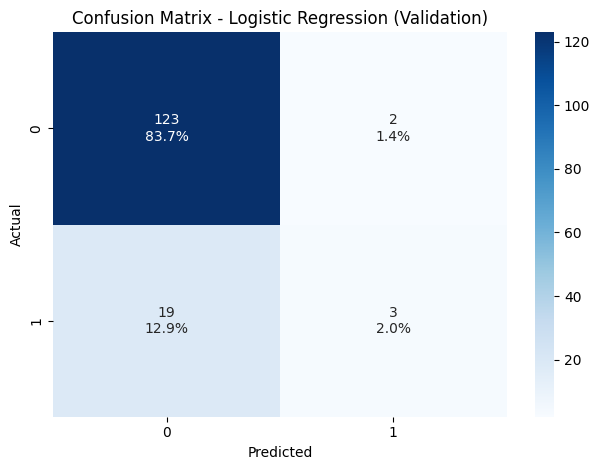

In [128]:
# employee_attrition_models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import random
!pip install --upgrade xgboost
from xgboost import XGBClassifier

# library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Clear the previous session to ensure a fresh start each time
from tensorflow.keras import backend
backend.clear_session()

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets to Consider/IBM.csv')
df['target'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop(columns=['Attrition'], inplace=True)
df.fillna("Unknown", inplace=True)
df_encoded = pd.get_dummies(df.drop(columns=['target']), drop_first=True)
df_encoded['target'] = df['target']

# Features and target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

# Train-test-validation split (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Result storage
eval_results = []
best_model_name = ""

def store_results(model_name, y_true, y_pred, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    global best_model_name
    eval_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC': auc_score,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    })
    if not hasattr(store_results, "best_auc") or auc_score > store_results.best_auc:
        store_results.best_auc = auc_score
        best_model_name = model_name

# Apply StandardScaler for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression with random_state set for reproducibility
log_model = LogisticRegression(max_iter=1000, random_state=random_seed)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_val_scaled)
y_prob_log = log_model.predict_proba(X_val_scaled)[:, 1]
store_results("Logistic Regression", y_val, y_pred_log, y_prob_log)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]
store_results("Random Forest", y_val, y_pred_rf, y_prob_rf)

# GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Tree depth (None = unlimited)
    'min_samples_split': [2, 5, 10],          # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples required at a leaf node
    'bootstrap': [True, False]                # Use bootstrap sampling or not
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=random_seed), param_grid, cv=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)

# Use the best hyperparameters found by GridSearchCV for Random Forest
best_rf_model = gs_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_gs = best_rf_model.predict(X_val)
y_prob_gs = best_rf_model.predict_proba(X_val)[:, 1]
store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)

# GridSearchCV best results
print("\nBest Hyperparameters for Random Forest (GridSearchCV):")
print(gs_rf.best_params_)
print(f"Best AUC Score: {gs_rf.best_score_:.4f}\n")

# XGBoost Model with random_state for reproducibility
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=random_seed)
xgb_model.fit(X_train, y_train)  # No early stopping
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]
store_results("XGBoost", y_val, y_pred_xgb, y_prob_xgb)

# Neural Networks (Separate for each optimizer: ADAM, RMSPROP, SGD)
optimizers = ['adam', 'rmsprop', 'sgd']
y_prob_nn_adam, y_prob_nn_rmsprop, y_prob_nn_sgd = None, None, None

for opt in optimizers:
    # Clear session and set seed for reproducibility before each model
    backend.clear_session()
    np.random.seed(random_seed)
    random.seed(random_seed)
    tf.random.set_seed(random_seed)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed))
    ])

    # Compile the model with a seed for reproducibility
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with a fixed random seed
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0, shuffle=False)

    # Predict probabilities and store results
    y_prob_nn = model.predict(X_val_scaled).ravel()
    y_pred_nn = (y_prob_nn > 0.5).astype(int)
    store_results(f"Neural Net ({opt.upper()})", y_val, y_pred_nn, y_prob_nn)

    # Store probabilities for ROC curve
    if opt == 'adam':
        y_prob_nn_adam = y_prob_nn
    elif opt == 'rmsprop':
        y_prob_nn_rmsprop = y_prob_nn
    elif opt == 'sgd':
        y_prob_nn_sgd = y_prob_nn

# Final comparison DataFrame
results_df = pd.DataFrame(eval_results).sort_values(by='AUC', ascending=False)
print("Model Comparison Summary:")
print(results_df)

# ROC Curves (Including all models, including all neural nets)
plt.figure(figsize=(6, 6))
model_roc_data = [
    ("Logistic Regression", y_val, y_prob_log),
    ("Random Forest", y_val, y_prob_rf),
    ("RF (GridSearchCV)", y_val, y_prob_gs),
    ("XGBoost", y_val, y_prob_xgb),
    ("Neural Net (ADAM)", y_val, y_prob_nn_adam),
    ("Neural Net (RMSPROP)", y_val, y_prob_nn_rmsprop),
    ("Neural Net (SGD)", y_val, y_prob_nn_sgd),
]

for model_name, y_true, y_prob in model_roc_data:
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IBM - ROC Curves (Validation Set)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plotting Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('IBM - Model Comparison Across Metrics (Validation Set)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Show feature importances for best model if applicable
if best_model_name == "Random Forest":
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (Random Forest):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - Random Forest')
    plt.tight_layout()
    plt.show()
elif best_model_name == "RF (GridSearchCV)":
    importances = gs_rf.best_estimator_.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (RF GridSearchCV):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - RF (GridSearchCV)')
    plt.tight_layout()
    plt.show()
elif best_model_name == "Logistic Regression":
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': log_model.coef_[0]
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    top_positive = coef_df.head(10)
    top_negative = coef_df.tail(10).sort_values(by='Coefficient')

    print("Top 10 Features that Increase Likelihood of Leaving:")
    print(top_positive)
    print("Top 10 Features that Decrease Likelihood of Leaving:")
    print(top_negative)

    plt.figure(figsize=(10, 6))
    combined_df = pd.concat([top_positive, top_negative])
    sns.barplot(x='Coefficient', y='Feature', data=combined_df, palette='coolwarm')
    plt.title('Top Positive and Negative Influential Features - Logistic Regression')
    plt.tight_layout()
    plt.show()
else:
    print(f"Feature importances not supported for model: {best_model_name}")

# Show confusion matrix for best model
print(f"Confusion Matrix for Best Model: {best_model_name}")
if best_model_name == "Logistic Regression":
    cm = confusion_matrix(y_val, y_pred_log)
elif best_model_name == "Random Forest":
    cm = confusion_matrix(y_val, y_pred_rf)
elif best_model_name == "RF (GridSearchCV)":
    cm = confusion_matrix(y_val, y_pred_gs)
elif best_model_name == "XGBoost":
    cm = confusion_matrix(y_val, y_pred_xgb)
elif "Neural Net" in best_model_name:
    cm = confusion_matrix(y_val, y_pred_nn)
else:
    cm = None

if cm is not None:
    cm_sum = cm.sum()
    labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_model_name} (Validation)')
    plt.tight_layout()
    plt.show()


## Balance Class Weights and Tune Parameters (including SMOTENC - SMOTE for Nominal and Continuous)

Best Hyperparameters for Random Forest (GridSearchCV):
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 250}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Comparison Summary:
                  Model  Accuracy       AUC  Precision    Recall  F1 Score
1         Random Forest  0.795918  0.696364   0.357143  0.454545  0.400000
3               XGBoost  0.775510  0.692000   0.296296  0.363636  0.326531
2     RF (GridSearchCV)  0.782313  0.688000   0.307692  0.363636  0.333333
6      Neural Net (SGD)  0.782313  0.658545   0.343750  0.500000  0.407407
0   Logistic Regression  0.721088  0.657091   0.268293  0.500000  0.349206
5  Neural Net (RMSPROP)  0.755102  0.641455   0.294118  0.454545  0.357143
4     Neural Net (ADAM)  0.727891  0.640364   0.263158  0.454545  0.333333


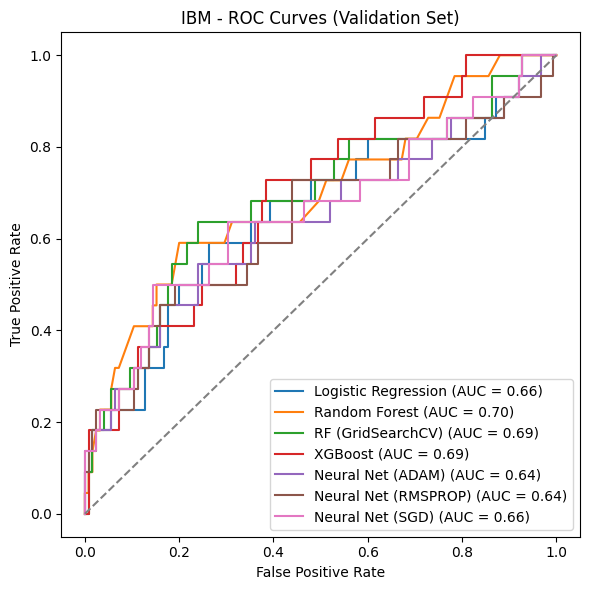

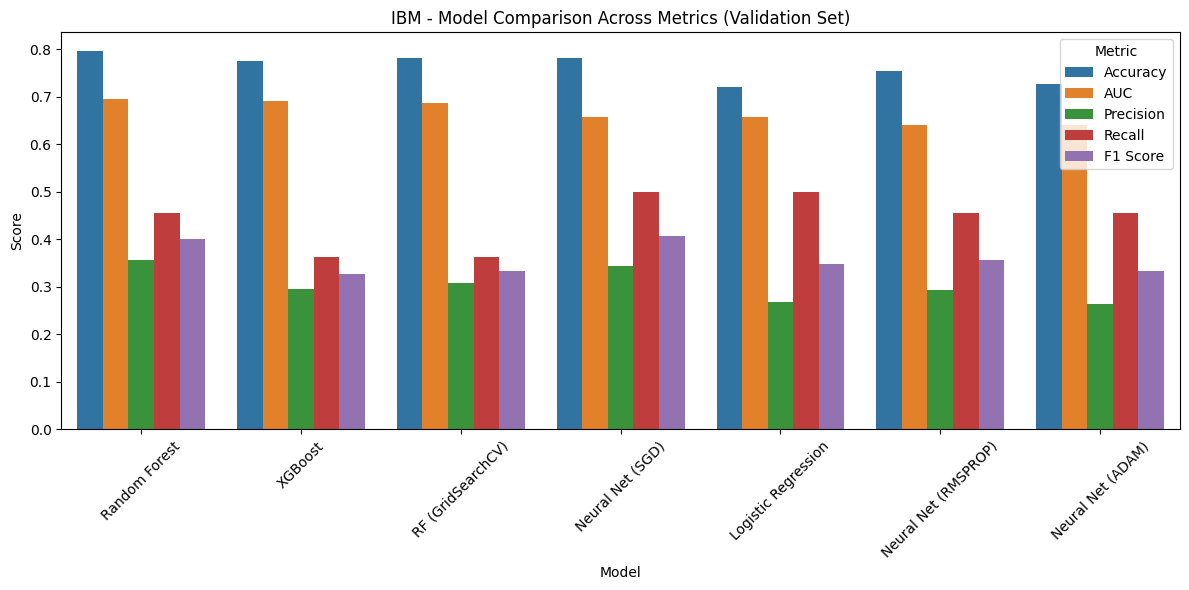


Top 20 Features (Random Forest):
                              Feature  Importance
5                       MonthlyIncome    0.158942
0                                 Age    0.104625
8                      YearsAtCompany    0.103802
4                     JobSatisfaction    0.096312
17               MaritalStatus_Single    0.086473
1                    DistanceFromHome    0.083282
3             EnvironmentSatisfaction    0.071011
7                     WorkLifeBalance    0.061854
6                  NumCompaniesWorked    0.059212
2                           Education    0.048553
10                   Department_Sales    0.027554
9   Department_Research & Development    0.020676
16              MaritalStatus_Married    0.019580
13             EducationField_Medical    0.017905
11       EducationField_Life Sciences    0.014851
12           EducationField_Marketing    0.010200
15    EducationField_Technical Degree    0.008365
14               EducationField_Other    0.006803


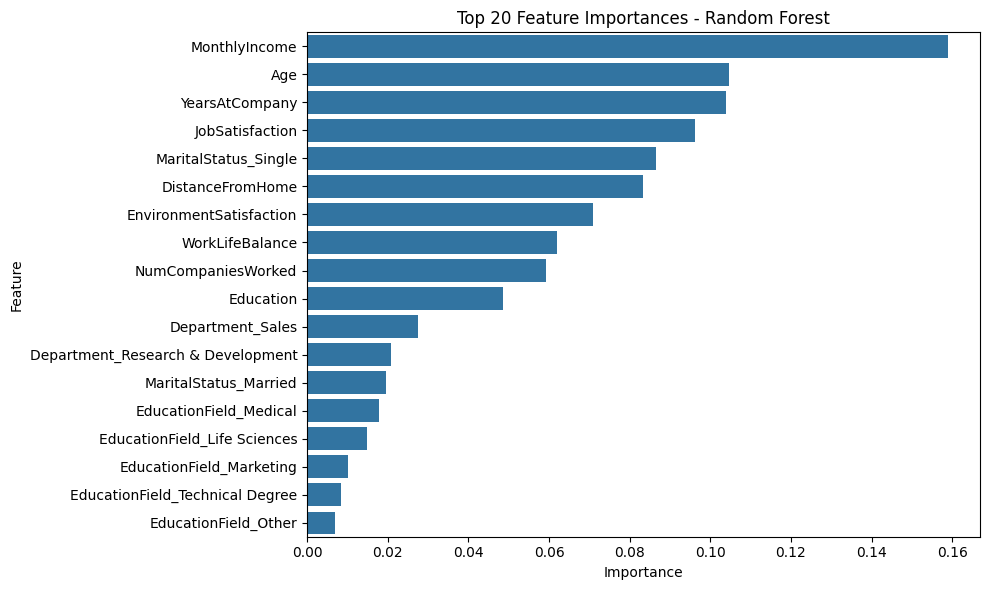

Confusion Matrix for Best Model: Random Forest (Validation)


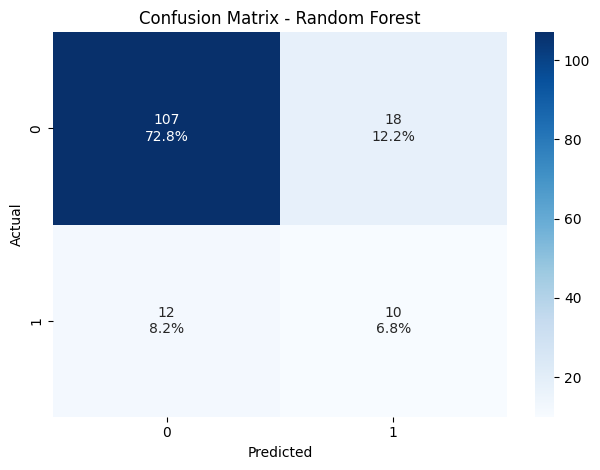

In [130]:
# employee_attrition_models with SMOTENC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall
import tensorflow as tf
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Set seed
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
import random
random.seed(random_seed)

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets to Consider/IBM.csv')
df['target'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop(columns=['Attrition'], inplace=True)
df.fillna("Unknown", inplace=True)

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Train-test-validation split before encoding
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=random_seed)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

# One-hot encode after resampling
X_train_res = pd.get_dummies(X_train_res, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train_res, X_val = X_train_res.align(X_val, join='left', axis=1, fill_value=0)
X_train_res, X_test = X_train_res.align(X_test, join='left', axis=1, fill_value=0)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Store results
eval_results = []
best_model_name = ""

def store_results(model_name, y_true, y_pred, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    global best_model_name
    eval_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC': auc_score,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    })
    if not hasattr(store_results, "best_auc") or auc_score > store_results.best_auc:
        store_results.best_auc = auc_score
        best_model_name = model_name

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=random_seed)
log_model.fit(X_train_scaled, y_train_res)
y_pred_log = log_model.predict(X_val_scaled)
y_prob_log = log_model.predict_proba(X_val_scaled)[:, 1]
store_results("Logistic Regression", y_val, y_pred_log, y_prob_log)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]
store_results("Random Forest", y_val, y_pred_rf, y_prob_rf)

# GridSearchCV for RF
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 4, 6],
    'bootstrap': [True, False]
}
gs_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=random_seed),
                     param_grid, scoring='recall', cv=3, n_jobs=-1)
gs_rf.fit(X_train_res, y_train_res)

# Use the best hyperparameters found by GridSearchCV for Random Forest
best_rf_model = gs_rf.best_estimator_
best_rf_model.fit(X_train_res, y_train_res)
y_pred_gs = best_rf_model.predict(X_val)
y_prob_gs = best_rf_model.predict_proba(X_val)[:, 1]
store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)

print("Best Hyperparameters for Random Forest (GridSearchCV):")
print(gs_rf.best_params_)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=random_seed, scale_pos_weight=1)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]
store_results("XGBoost", y_val, y_pred_xgb, y_prob_xgb)

# Neural Nets
optimizers = ['adam', 'rmsprop', 'sgd']
y_prob_nn_adam, y_prob_nn_rmsprop, y_prob_nn_sgd = None, None, None

for opt in optimizers:
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[Recall()])
    history = model.fit(X_train_scaled, y_train_res, epochs=50, batch_size=32,
                        validation_data=(X_val_scaled, y_val),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                        verbose=0)
    y_prob_nn = model.predict(X_val_scaled).ravel()
    y_pred_nn = (y_prob_nn > 0.5).astype(int)
    store_results(f"Neural Net ({opt.upper()})", y_val, y_pred_nn, y_prob_nn)

    if opt == 'adam':
        y_prob_nn_adam = y_prob_nn
    elif opt == 'rmsprop':
        y_prob_nn_rmsprop = y_prob_nn
    elif opt == 'sgd':
        y_prob_nn_sgd = y_prob_nn

# Results summary
results_df = pd.DataFrame(eval_results).sort_values(by='AUC', ascending=False)
print("Model Comparison Summary:")
print(results_df)

# ROC Curves (Including all models, including all neural nets)
plt.figure(figsize=(6, 6))
model_roc_data = [
    ("Logistic Regression", y_val, y_prob_log),
    ("Random Forest", y_val, y_prob_rf),
    ("RF (GridSearchCV)", y_val, y_prob_gs),
    ("XGBoost", y_val, y_prob_xgb),
    ("Neural Net (ADAM)", y_val, y_prob_nn_adam),
    ("Neural Net (RMSPROP)", y_val, y_prob_nn_rmsprop),
    ("Neural Net (SGD)", y_val, y_prob_nn_sgd),
]

for model_name, y_true, y_prob in model_roc_data:
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IBM - ROC Curves (Validation Set)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plotting Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('IBM - Model Comparison Across Metrics (Validation Set)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show feature importances for best model if applicable
if best_model_name == "Random Forest":
    importances = rf_model.feature_importances_
    feature_names = X_train_res.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (Random Forest):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - Random Forest')
    plt.tight_layout()
    plt.show()
elif best_model_name == "RF (GridSearchCV)":
    importances = gs_rf.best_estimator_.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (RF GridSearchCV):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - RF (GridSearchCV)')
    plt.tight_layout()
    plt.show()
elif best_model_name == "Logistic Regression":
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': log_model.coef_[0]
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    top_positive = coef_df.head(10)
    top_negative = coef_df.tail(10).sort_values(by='Coefficient')

    print("Top 10 Features that Increase Likelihood of Leaving:")
    print(top_positive)
    print("Top 10 Features that Decrease Likelihood of Leaving:")
    print(top_negative)

    plt.figure(figsize=(10, 6))
    combined_df = pd.concat([top_positive, top_negative])
    sns.barplot(x='Coefficient', y='Feature', data=combined_df, palette='coolwarm')
    plt.title('Top Positive and Negative Influential Features - Logistic Regression')
    plt.tight_layout()
    plt.show()
else:
    print(f"Feature importances not supported for model: {best_model_name}")

# Show confusion matrix for best model
print(f"Confusion Matrix for Best Model: {best_model_name} (Validation)")
if best_model_name == "Logistic Regression":
    cm = confusion_matrix(y_val, y_pred_log)
elif best_model_name == "Random Forest":
    cm = confusion_matrix(y_val, y_pred_rf)
elif best_model_name == "RF (GridSearchCV)":
    cm = confusion_matrix(y_val, y_pred_gs)
elif best_model_name == "XGBoost":
    cm = confusion_matrix(y_val, y_pred_xgb)
elif "Neural Net" in best_model_name:
    cm = confusion_matrix(y_val, y_pred_nn)
else:
    cm = None

if cm is not None:
    cm_sum = cm.sum()
    labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.tight_layout()
    plt.show()


## Run Predictions Using the Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       130
           1       0.37      0.41      0.39        17

    accuracy                           0.85       147
   macro avg       0.65      0.66      0.65       147
weighted avg       0.86      0.85      0.85       147



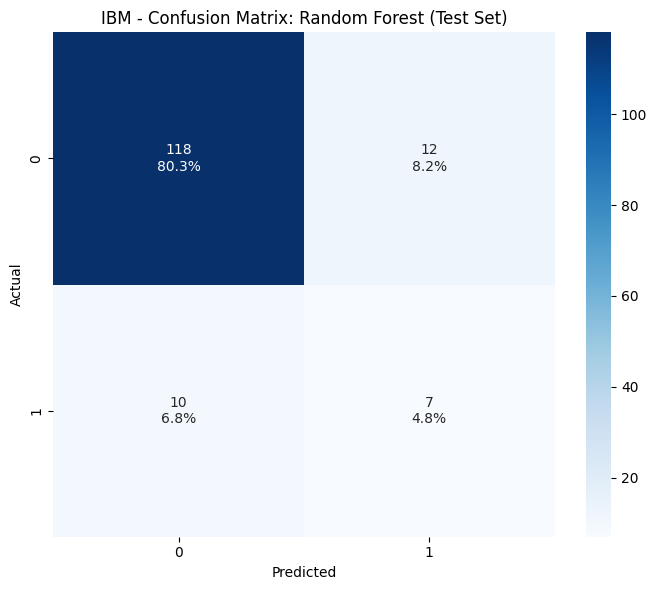

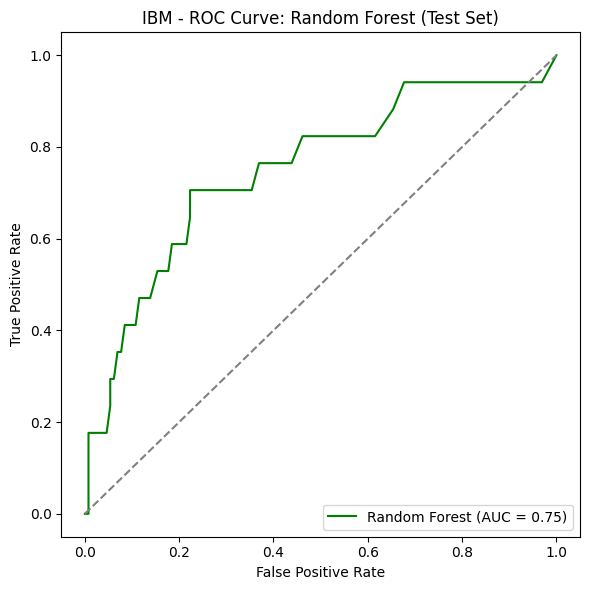

In [131]:
# Make predictions on the test data using Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_prob_rf_test = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_test)
cm_sum = cm.sum()
labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('IBM - Confusion Matrix: Random Forest (Test Set)')
plt.tight_layout()
plt.show()

# ROC Curve and AUC for Random Forest
fpr, tpr, _ = roc_curve(y_test, y_prob_rf_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='green', label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('IBM - ROC Curve: Random Forest (Test Set)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
